<a href="https://colab.research.google.com/github/wlail-iu/D590-NLP-F24/blob/main/WLail_GloVe_1_Scrivner_D590_NLP_Fall24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GloVe

Adapted from Christopher Maanning. 2020. Natural Language Processing with Deep Learning

In [1]:
import numpy as np
# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Download Glove Pre-trained vectors and conver to word2vec model

In [2]:
# what is your working directory: You need a full path to glove.6B.50d.txt in the next code block cell
# pwd()

In [3]:
# if you uploaded zip file downloaded from kaggle, only then run this command to unzip the dataset
!unzip /content/glove.6B.50d.txt.zip -d /content/

Archive:  /content/glove.6B.50d.txt.zip
  inflating: /content/glove.6B.50d.txt  


In [4]:
glove_file = datapath('/content/glove.6B.50d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-4-dfae7b24fe45>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 50)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('king') # try different words

[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253692626953)]

In [7]:
# woman + king - man = queen
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


## Analogy task

In [8]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [9]:
analogy('good', 'fantastic', 'bad') # try different analogies

'dreadful'

In [10]:
analogy('milk', 'espresso', 'coffee')

'cappuccino'

Note - if the word is OOV (out-of-vocabulary), you will get an error.

In [11]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

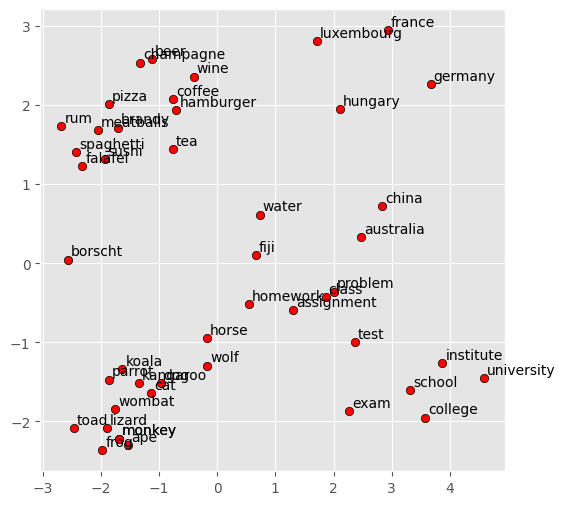

In [12]:
## Try with different words
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [13]:
model.most_similar('jack') # try different word

[('tom', 0.8067809343338013),
 ('smith', 0.7816073298454285),
 ('wilson', 0.78150874376297),
 ('charlie', 0.7811511754989624),
 ('baker', 0.7801468372344971),
 ('jim', 0.7768940329551697),
 ('allen', 0.7764152884483337),
 ('collins', 0.7745512127876282),
 ('nicholson', 0.7718936204910278),
 ('bennett', 0.769619882106781)]

In [14]:
analogy('cookie', 'pudding', 'chocolate') # try different analogy

'syrup'

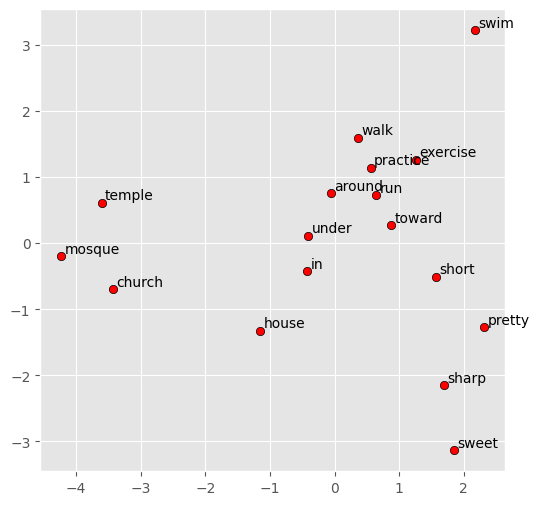

In [16]:
## Try with different words
display_pca_scatterplot(model,
                        ['swim', 'walk', 'run', 'exercise', 'practice', 'church', 'temple', 'mosque', 'house',
                         'pretty', 'sharp', 'sweet', 'short', 'in', 'around', 'toward', 'under'])